In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
ice = pd.read_csv('Ice.csv')
ice

,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive
Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235
Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020
Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941
Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078
Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608
Solero,0.235294,0.245098,0.049020,0.147059,0.225490,0.117647,0.078431,0.127451,0.107843,0.088235,0.235294,0.117647,0.137255,0.176471
Jolly,0.313725,0.147059,0.049020,0.284314,0.294118,0.225490,0.068627,0.029412,0.107843,0.098039,0.039216,0.009804,0.362745,0.029412
Calippo,0.343137,0.225490,0.088235,0.529412,0.460784,0.235294,0.078431,0.000000,0.245098,0.176471,0.254902,0.009804,0.431373,0.049020
Twinni,0.372549,0.215686,0.068627,0.313725,0.323529,0.274510,0.058824,0.029412,0.254902,0.098039,0.098039,0.019608,0.441176,0.039216
Tritti,0.019608,0.019608,0.009804,0.029412,0.019608,0.049020,0.000000,0.009804,0.019608,0.039216,0.009804,0.098039,0.058824,0.009804


In [3]:

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.spatial.distance import pdist, squareform

from pca import pca

In [4]:
normalized_ice = (ice-ice.mean())/ice.std()

In [5]:
hclust = linkage(normalized_ice, method='average', metric='cityblock')
print(hclust)

[[ 4.          9.          1.55369644  2.        ]
 [ 6.          8.          5.09560043  2.        ]
 [ 0.          3.          6.32743304  2.        ]
 [ 1.          2.          7.07299107  2.        ]
 [10.         11.          8.35864833  3.        ]
 [ 7.         12.          8.58346143  3.        ]
 [13.         15.          9.46118002  5.        ]
 [ 5.         17.         11.99151237  6.        ]
 [16.         18.         17.85529778  9.        ]
 [14.         19.         20.68430418 11.        ]]


# I chose manhattan distance because we have dataset which has a number of features that is larger than the number of observations and it can cause the curse of dimensionality. Manhattan distance is usually preferred over the more common Euclidean distance when there is high dimensionality in the data.

In [6]:
labels, indices = np.unique(ice.index, return_inverse=True)
ice_labels = labels[indices] 

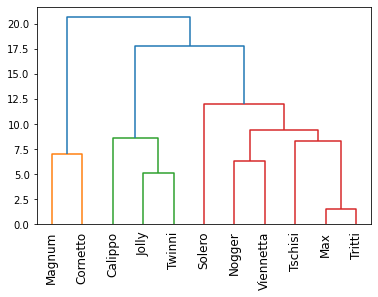

In [8]:
d = dendrogram(hclust, labels=ice_labels, leaf_rotation=90)
plt.pyplot.show()

In [9]:
cluster3 = pd.DataFrame({'Ice_cream': ice_labels, 'Level': cut_tree(hclust, height=13)[:, 0]})

print(cluster3)

    Ice_cream  Level
0      Nogger      0
1      Magnum      1
2    Cornetto      1
3   Viennetta      0
4         Max      0
5      Solero      0
6       Jolly      2
7     Calippo      2
8      Twinni      2
9      Tritti      0
10    Tschisi      0


# I chose to show 3 levels (clusters) because it is easier to interpret

In [10]:
ice.reset_index(inplace=True)
ice["Level"] = cluster3["Level"]

In [11]:
ice

,index,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive,Level
0,Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235,0
1,Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020,1
2,Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941,1
3,Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078,0
4,Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608,0
5,Solero,0.235294,0.245098,0.049020,0.147059,0.225490,0.117647,0.078431,0.127451,0.107843,0.088235,0.235294,0.117647,0.137255,0.176471,0
6,Jolly,0.313725,0.147059,0.049020,0.284314,0.294118,0.225490,0.068627,0.029412,0.107843,0.098039,0.039216,0.009804,0.362745,0.029412,2
7,Calippo,0.343137,0.225490,0.088235,0.529412,0.460784,0.235294,0.078431,0.000000,0.245098,0.176471,0.254902,0.009804,0.431373,0.049020,2
8,Twinni,0.372549,0.215686,0.068627,0.313725,0.323529,0.274510,0.058824,0.029412,0.254902,0.098039,0.098039,0.019608,0.441176,0.039216,2
9,Tritti,0.019608,0.019608,0.009804,0.029412,0.019608,0.049020,0.000000,0.009804,0.019608,0.039216,0.009804,0.098039,0.058824,0.009804,0


In [12]:
print(ice.groupby(["Level"]).mean())

       tastes_excellent  look_good  satisfies_hunger  satisfies_thirst  \
Level                                                                    
0              0.129085   0.107843          0.050654          0.037582   
1              0.446078   0.318627          0.294118          0.034314   
2              0.343137   0.196078          0.068627          0.375817   

       refreshing  for_everyday  for_special  for_adults  favorite  different  \
Level                                                                           
0        0.066993      0.075163     0.080065    0.096405  0.063725   0.062092   
1        0.088235      0.210784     0.279412    0.397059  0.254902   0.137255   
2        0.359477      0.245098     0.068627    0.019608  0.202614   0.124183   

           cool  never_eat       fun  expensive  
Level                                            
0      0.078431   0.099673  0.102941   0.084967  
1      0.171569   0.029412  0.102941   0.450980  
2      0.130719   0.013

In [13]:
normalized_ice.reset_index(inplace=True)
normalized_ice["Level"] = cluster3["Level"]
print(normalized_ice.groupby(["Level"]).mean())

       tastes_excellent  look_good  satisfies_hunger  satisfies_thirst  \
Level                                                                    
0             -0.741323  -0.595867         -0.481773         -0.526758   
1              1.284264   1.417311          1.903803         -0.545540   
2              0.626470   0.246859         -0.305656          1.417209   

       refreshing  for_everyday  for_special  for_adults  favorite  different  \
Level                                                                           
0       -0.550108     -0.766444    -0.298096   -0.216482 -0.728306  -0.623336   
1       -0.410383      0.697496     1.495825    1.713736  1.188524   0.907771   
2        1.373804      1.067890    -0.401025   -0.709527  0.664263   0.641492   

           cool  never_eat       fun  expensive  
Level                                            
0     -0.333246   0.832709 -0.545643  -0.314070  
1      0.661731  -0.774929 -0.545643   1.811940  
2      0.225338  -1.148

## "tastes_excellent" is significantly different between the clusters

## "look_good" is significantly different between the clusters

## "different" is significantly different between the clusterst

## "never_eat" is significantly different between the clusterst

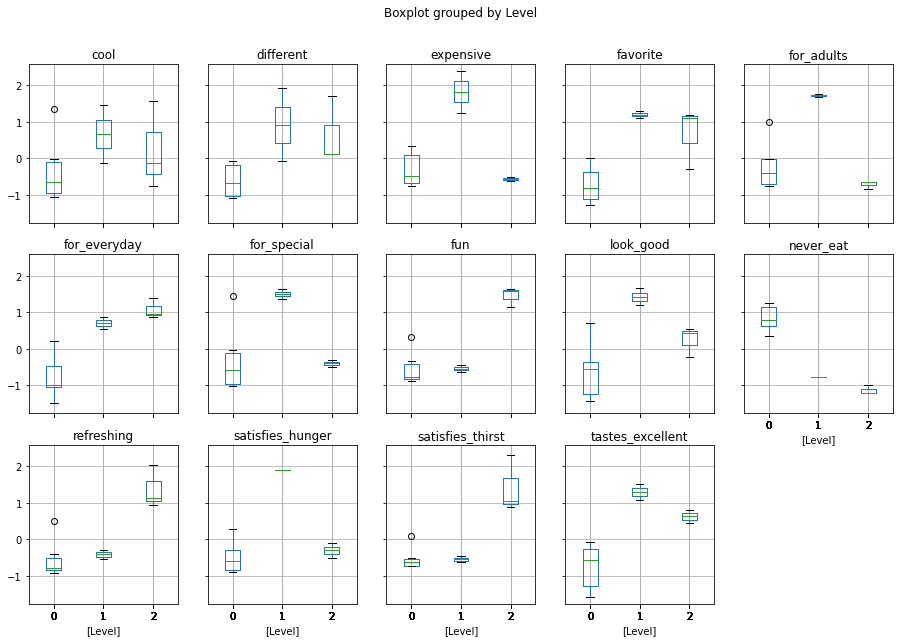

In [31]:
normalized_ice.boxplot(by="Level", figsize=(15,10), layout=(3,5));